#**IMPORT NECESSARY LIBRARIES📚**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.api as sm

#**MONTECARLO🎰**


In [ ]:
# 📌 Monte Carlo Experiments – Detailed Theory
# ==========================================

# Introduction
# ------------
# Monte Carlo experiments are a powerful computational tool used to assess the performance of
# econometric estimators in terms of bias, consistency, and asymptotic normality.

# 📈 Linear Regression Model
# -----------------------
# Consider a simple linear regression model:
#
#   Y_t = β_0 + β_1 * X_t + u_t, for t = 1, ..., T
#
# Where:
# - Y_t is the dependent variable
# - X_t is the independent variable
# - β_0 and β_1 are parameters
# - u_t is a random error term

# In matrix notation, the model can be expressed as:
#
#   Y = Xβ + U
#
# Where:
# - Y is a T×1 vector of observations of the dependent variable
# - X is a T×2 matrix containing a column of ones (for intercept β_0) and X_t values
# - β is a 2×1 vector containing the parameters β_0 and β_1
# - U is a T×1 vector of error terms

# ⚖️ Assumptions
# -----------
# We assume the following:
# - (u_t, X_t) are independently and identically distributed (i.i.d.)
# - E[u_t | X_t] = 0 → conditional mean independence
# - E[X_t²] < ∞ → finite variance of X_t
# - E[u_t²] = σ² → constant variance of errors (homoscedasticity)

# 🧠 Ordinary Least Squares (OLS) Estimator
# --------------------------------------
# Under these assumptions, the OLS estimator is given by:
#
#   β̂ = (X'X)⁻¹X'Y
#
# Properties of the OLS estimator:
# - Unbiased: E[β̂] = β
# - Consistent: β̂ → β as T → ∞
# - Asymptotically Normal: √T(β̂ - β) → N(0, σ² E[X'X]⁻¹)

# 🎯 Unbiasedness
# ------------
# To show unbiasedness:
#
#   E[β̂] = E[(X'X)⁻¹X'Y]
#         = E[(X'X)⁻¹X'(Xβ + U)]
#         = E[(X'X)⁻¹(X'Xβ + X'U)]
#         = β + (X'X)⁻¹E[X'U]
#
# Given E[U|X] = 0, we have E[X'U] = 0, thus:
#
#   E[β̂] = β → unbiasedness

# 🔁 Consistency
# -----------
# To demonstrate consistency:
#
#   β̂ - β = (X'X)⁻¹X'U
# Multiplying by 1/T:
#   (1/T)X'X(β̂ - β) = (1/T)X'U
# By Law of Large Numbers (LLN):
# - (1/T)X'X → E[X'X]
# - (1/T)X'U → 0
# Hence:
#   β̂ - β → 0 as T → ∞, thus β̂ is consistent.

# 🔔 Asymptotic Normality
# --------------------
# For asymptotic normality, we start with:
#
#   √T(β̂ - β) = (X'X/T)⁻¹(X'U/√T)
#
# Applying Central Limit Theorem (CLT) to X'U/√T, we obtain:
#
#   √T(β̂ - β) → N(0, σ²E[X'X]⁻¹)
# Thus, the OLS estimator is asymptotically normally distributed.

# 🎲 Monte Carlo Simulation
# ----------------------
# The purpose of a Monte Carlo simulation is to empirically verify the theoretical properties of the OLS estimator.
# Steps involved:
# 1. Choose true values for β_0 and β_1.
# 2. Generate random data for X_t and u_t.
# 3. Compute Y_t using the model: Y_t = β_0 + β_1*X_t + u_t.
# 4. Estimate β̂ using OLS.
# 5. Repeat many times to analyze the empirical distribution of β̂.

# Evaluating Results:
# - Compare the mean of β̂ to the true β_0 and β_1 to check bias.
# - Check whether variance of β̂ decreases with larger T (consistency).
# - Compare the empirical distribution of β̂ with the theoretical asymptotic normal distribution.

# Conclusion
# ----------
# Monte Carlo simulations allow us to validate empirically the theoretical predictions of OLS estimators.
# By observing the behavior of the estimator across multiple simulated samples, we can confirm whether:
# - The estimator is unbiased.
# - The estimator is consistent.
# - The estimator is asymptotically normally distributed.

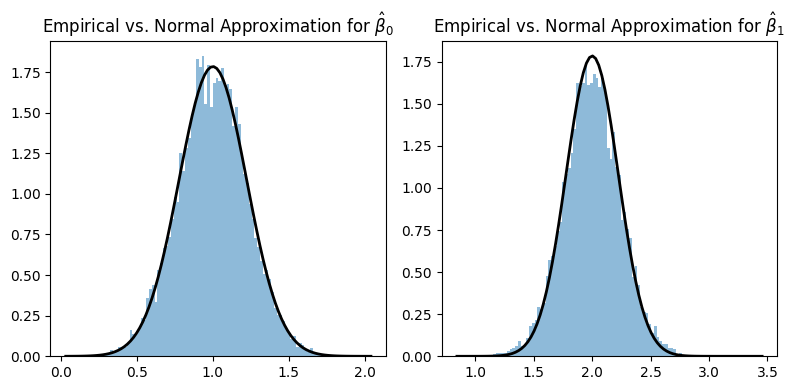

In [ ]:
# Set parameters
T = 20  # 1️⃣ Define the number of observations per simulation
beta_0_true = 1  # 2️⃣ True value of beta_0
beta_1_true = 2  # 3️⃣ True value of beta_1
sigma = 1  # 4️⃣ Standard deviation of the error term
num_simulations = 10000  # 5️⃣ Total number of Monte Carlo simulations

# 6️⃣ Create arrays to store beta_0 and beta_1 estimates
beta_0_estimates = np.zeros(num_simulations)
beta_1_estimates = np.zeros(num_simulations)

# Run simulations
for i in range(num_simulations):  # 7️⃣ Monte Carlo loop to repeat the experiment many times
    x = np.random.normal(0, 1, T)  # 8️⃣ Generate T values of X from a normal distribution
    u = np.random.normal(0, sigma, T)  # 9️⃣Generate T values of random errors
    y = beta_0_true + beta_1_true * x + u  # 1️⃣0️⃣ Create dependent variable Y according to the model

    # OLS estimation
    X = np.vstack([np.ones(T), x]).T  # 1️⃣1️⃣ Create matrix X by adding a column of ones for beta_0
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y  # 1️⃣3️⃣ Compute OLS coefficient estimates
    beta_0_estimates[i] = beta_hat[0]  # 1️⃣3️⃣ Save estimate of beta_0
    beta_1_estimates[i] = beta_hat[1]  # 1️⃣4️⃣ Save estimate of beta_1

# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(8, 4))  # 1️⃣5️⃣ Create two side-by-side subplots

# Distribution of beta_0
ax[0].hist(beta_0_estimates, bins=100, alpha=0.5, density=True)  # 1️⃣6️⃣ Histogram of beta_0 estimates
xmin, xmax = ax[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, beta_0_true, 1/np.sqrt(T))  # 1️⃣7️⃣ Create theoretical normal curve
ax[0].plot(x, p, 'k', linewidth=2)  # 1️⃣8️⃣ Plot theoretical normal distribution
ax[0].set_title(f'Empirical vs. Normal Approximation for $\\hat{{\\beta}}_0$')  # 1️⃣9️⃣ Title of the plot

# Distribution of beta_1
ax[1].hist(beta_1_estimates, bins=100, alpha=0.50, density=True)  # 2️⃣0️⃣ Histogram of beta_1 estimates
xmin, xmax = ax[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, beta_1_true, 1/np.sqrt(T))  # 2️⃣1️⃣ Create theoretical normal curve for beta_1
ax[1].plot(x, p, 'k', linewidth=2)  # 2️⃣2️⃣ Plot theoretical normal distribution for beta_1
ax[1].set_title(f'Empirical vs. Normal Approximation for $\\hat{{\\beta}}_1$')  # 2️⃣3️⃣ Title of the second plot

plt.tight_layout()  # 2️⃣4️⃣ Improve plot layout
plt.show()  # 2️⃣5️⃣ Display the plots

In [ ]:
# 🧗 Monte Carlo Experiment - Purpose and Interpretation
# ------------
# Our goal is to empirically verify whether the OLS estimates for β0 and β1
# satisfy the theoretical properties: unbiasedness, consistency, and asymptotic normality.

# Key Concepts of OLS
# -------------------
# We know the OLS estimator has three fundamental properties:
# 1️⃣ **Unbiasedness**: E[β̂] = β → the mean of the estimates should match the true parameter values.
# 2️⃣ **Consistency**: β̂ → β as the number of observations T grows.
# 3️⃣ **Asymptotic Normality**: For large samples, β̂ follows a normal distribution centered at β.

# Objective of the Monte Carlo Experiment
# ---------------------------------------
# Our Monte Carlo experiment empirically tests these properties by:
# - Generating random samples repeatedly for X and U.
# - Estimating β̂0 and β̂1 using OLS.
# - Analyzing the empirical distribution of these estimates.
# - Comparing results to the theoretical normal distribution.

# What Do We Check?
# -----------------
# 1️⃣ **The mean of estimates β̂0 and β̂1**: If close to the true values, the estimator is unbiased.
# 2️⃣ **The variability of estimates**: Should decrease as T increases, confirming consistency.
# 3️⃣ **The shape of the distribution**: Should approximate normality, confirming asymptotic normality.

# Interpreting Results
# --------------------
# - If the histogram of β̂ estimates is centered around β, the estimator is unbiased.
# - If increasing T reduces the variance of estimates, consistency is confirmed.
# - If the histogram closely follows the expected normal curve, asymptotic normality is verified.

# 🔬🔬🔬 In Our case, as we can see the two histograms for β̂0 and β̂1 are centred on the true values (β0 and β1) that we had set at the beginning.

# Conclusion
# ----------
# Monte Carlo experiments empirically validate the theoretical properties of OLS estimators.
# In this experiment, we've observed that β̂ behaves as expected theoretically, confirming
# the robustness and reliability of the OLS estimator.

##**CONFIDENCE INTERVALS📏**

In [ ]:
# 🎢 Theory of Confidence Intervals
# ==============================
# A confidence interval (CI) is an interval constructed around a point estimate
# (such as beta_hat), indicating the interval within which the true parameter lies
# with a certain level of confidence.
# Here, we calculate 95% confidence intervals:
# - If the distribution of estimates follows asymptotic normality, the true beta
#   should fall inside the interval approximately 95% of the time.
# - If the Monte Carlo experiment aligns with theory, the frequency at which the true
#   beta is contained within the CI should be about 0.95 (95%).
# - Significant deviation from 0.95 might indicate problems with the model specification
#   or theoretical approximation.

# 1️⃣ Import necessary libraries:

# Set parameters
T = 50  # 2️⃣ Number of observations per simulation
beta_0_true = 1  # 3️⃣ True value of beta_0
beta_1_true = 2  # 4️⃣ True value of beta_1
sigma = 1  # 5️⃣ Standard deviation of the error term
num_simulations = 10000  # 6️⃣ Number of Monte Carlo simulations

# 7️⃣ Create arrays to store simulation estimates and CI checks
beta_0_estimates = np.zeros(num_simulations)
beta_1_estimates = np.zeros(num_simulations)
beta_0_in = np.zeros(num_simulations)
beta_1_in = np.zeros(num_simulations)

# Run simulations
for i in range(num_simulations):  # 8️⃣ Repeat Monte Carlo experiment many times
    x = np.random.normal(0, 1, T)  # 9️⃣ Generate X from a normal distribution
    u = np.random.normal(0, sigma, T)  # 🔟 Generate error term U
    y = beta_0_true + beta_1_true * x + u  # 1️⃣1️⃣ Generate dependent variable Y

    # OLS estimation
    X = np.vstack([np.ones(T), x]).T  # 1️⃣2️⃣ Construct X matrix with an intercept column
    XXinv = np.linalg.inv(X.T @ X)  # 1️⃣3️⃣ Calculate inverse of X'X
    beta_hat = XXinv @ X.T @ y  # 1️⃣4️⃣ Compute OLS parameter estimates
    beta_0_estimates[i] = beta_hat[0]  # 1️⃣5️⃣ Save beta_0 estimate
    beta_1_estimates[i] = beta_hat[1]  # 1️⃣6️⃣ Save beta_1 estimate

    # Estimate error variance
    u_hat = y - beta_hat[0] - beta_hat[1] * x  # 1️⃣7️⃣ Model residuals
    sigma2_hat = np.dot(u_hat, u_hat) / (T - 2)  # 1️⃣8️⃣ Error variance estimate
    variance_hat = sigma2_hat * XXinv  # 1️⃣9️⃣ Variance-covariance matrix estimate

    # Calculate standard errors
    se_0 = np.sqrt(variance_hat[0, 0])  # 2️⃣0️⃣ Standard error for beta_0
    se_1 = np.sqrt(variance_hat[1, 1])  # 2️⃣1️⃣ Standard error for beta_1

    # Check if beta_0 and beta_1 fall into the 95% CI
    beta_0_in[i] = beta_hat[0] - 1.965 * se_0 < beta_0_true < beta_hat[0] + 1.965 * se_0  # 2️⃣2️⃣ CI check for beta_0
    beta_1_in[i] = beta_hat[1] - 1.965 * se_1 < beta_1_true < beta_hat[1] + 1.965 * se_1  # 2️⃣3️⃣ CI check for beta_1

# Output the results
print(f"Empirical 95% CI for beta_0: {np.mean(beta_0_in)}")  # 2️⃣4️⃣ Proportion of beta_0 in CI
print(f"Empirical 95% CI for beta_1: {np.mean(beta_1_in)}")  # 2️⃣5️⃣ Proportion of beta_1 in CI

# 📍 Conclusion
# ==========
# This experiment verifies if the OLS methodology yields reliable confidence intervals.
# If our code and theory are correct, we should observe that approximately 95% of the time,
# the true beta lies within the empirically calculated intervals.

# Interpretation of Monte Carlo Confidence Interval Results
# =========================================================

# This script provides a theoretical explanation of the Monte Carlo experiment results:
# Empirical 95% CI for beta_0: 0.9457
# Empirical 95% CI for beta_1: 0.9428

# We performed a Monte Carlo experiment to evaluate the accuracy of confidence intervals (CIs)
# constructed using OLS estimates. In each simulation:
# - We estimated the parameters beta_0 and beta_1.
# - We calculated standard errors for these estimates.
# - We constructed a 95% confidence interval around each estimate.
# - We checked whether the true values of the parameters were contained within the intervals.

# Results
# -------
# After 10,000 simulations, we observed:
# - The true value of beta_0 (which was 1) fell within the CI 94.57% of the time.
# - The true value of beta_1 (which was 2) fell within the CI 94.28% of the time.

# Interpretation
# --------------
# 1️⃣ A 95% confidence interval theoretically means that, if we repeated the experiment infinitely many times,
#    the true parameter would lie inside the interval 95% of the time.

# 2️⃣ In our case, the empirical results (94.57% and 94.28%) are very close to 95%, suggesting:
#    - OLS estimates behave as theoretically predicted.
#    - Calculated standard errors are accurate.
#    - The distribution of OLS estimates closely approximates a normal distribution.

# 3️⃣ Small deviations from 0.95 are expected and acceptable, especially given a finite number of simulations
#    and a moderate sample size T = 50.

# ✅ The results align well with theoretical expectations: our 95% confidence intervals are well-calibrated.
# ✅ This experiment confirms that, under classical assumptions, the OLS method produces reliable confidence intervals.
# ✅ This enhances confidence in statistical tests based on the normal approximation of OLS estimates,
#    at least under conditions similar to those simulated here.


Empirical 95% CI for beta_0: 0.948
Empirical 95% CI for beta_1: 0.949


#**BOOTSTRAP👢**


In [ ]:
# 🏦 Bootstrap - Detailed Theory and Method
# ======================================

# Introduction
# ------------
# The Bootstrap method is a statistical technique used to estimate the sampling distribution
# of a statistic or parameter by repeatedly resampling from the data with replacement.
# It is especially useful when the theoretical distribution of the statistic is unknown
# or difficult to derive analytically.

# Application to Linear Regression
# --------------------------------
# In the context of linear regression models, Bootstrap can be employed to make inferences
# about regression coefficients (parameters β).

# The detailed Bootstrap procedure for linear regression is as follows:

# 1️⃣ Input and Setup:
# We have a dataset (X, y) with n observations:
# - X is an n×k matrix (n observations, k regressors including intercept).
# - y is an n×1 column vector of the dependent variable.

# The general linear model is:
#   y = Xβ + u
# Where:
# - β are the parameters to estimate (k×1)
# - u is the vector of errors (n×1)

# 2️⃣ Original Model Estimation:
# We first estimate coefficients using Ordinary Least Squares (OLS):
# β̂ = (X'X)^(-1) X'y

# 3️⃣ Bootstrap Procedure:
# We generate B bootstrap samples:
# For each b = 1,...,B:

# a) Randomly sample (with replacement) n observations from the original dataset.
#    This creates a new Bootstrap sample (X*, y*).

# b) Estimate the model coefficients on this Bootstrap sample using OLS again:
#    β̂* = (X*'X*)^(-1) X*'y*

# c) Store the obtained coefficients β̂*.

# 4️⃣ Bootstrap Statistics:
# After repeating this process B times, we obtain an empirical distribution of β̂*.

# Compute the variance of the Bootstrap coefficients:
# Var_bootstrap(β̂*) = (1/(B-1)) ∑(β̂*_b - β̂*̄)^2
# where β̂*̄ is the mean of the Bootstrap estimates.

# 5️⃣ Bootstrap Confidence Intervals:
# Confidence intervals can be calculated using percentiles of the empirical distribution
# obtained from Bootstrap coefficients.
# For example, a 95% confidence interval:
# IC_95% = [β̂*_(2.5%), β̂*_(97.5%)]

# Output of the Bootstrap method:
# - Original OLS estimates.
# - Bootstrap variance estimates.
# - Empirical confidence intervals from the Bootstrap distribution.

# Why Use Bootstrap?
# ------------------
# 🔸 No restrictive assumptions about the distribution of errors.
# 🔸 Useful when exact distributions of test statistics are complicated or unknown.
# 🔸 Provides robust statistical inference directly based on the data.

# Conclusion
# ----------
# The Bootstrap method offers a practical and flexible way to quantify uncertainty in parameter
# estimates and assess the validity of confidence intervals without relying on complex theoretical distributions.


In [ ]:

# 1️⃣ Set random seed for reproducibility
np.random.seed(0)

# 2️⃣ Generate simulated data
T = 100  # Number of observations
x = np.random.normal(0, 1, T)  # Independent variable generated from N(0,1)
u = np.random.normal(0, 1, T)  # Random error term generated from N(0,1)
beta_0_true = 1  # True value of beta_0
beta_1_true = 2  # True value of beta_1

# 3️⃣ Generate dependent variable y following the linear model: y = beta_0 + beta_1 * x + u
y = beta_0_true + beta_1_true * x + u

# 4️⃣ Define a function to estimate linear regression coefficients using OLS
def fit_linear_model(x, y):
    X = np.vstack([np.ones(len(x)), x]).T  # Build matrix X with a column of ones and a column for x
    beta_hat = np.linalg.inv(X.T @ X) @ (X.T @ y)  # Apply OLS formula: (X'X)^(-1) X'y
    return beta_hat

# 5️⃣ Calculate estimated coefficients on the original dataset
initial_beta = fit_linear_model(x, y)

# 6️⃣ Set the number of bootstrap samples
B = 1000  # Number of bootstrap replications
bootstrap_estimates = np.zeros((B, 2))  # Array to store bootstrap estimates for beta_0 and beta_1

# 7️⃣ Perform Bootstrap resampling
for i in range(B):
    indices = np.random.choice(range(T), size=T, replace=True)  # Sample T indices with replacement
    x_resampled = x[indices]  # Resample x using indices
    y_resampled = y[indices]  # Resample y using the same indices
    bootstrap_estimates[i] = fit_linear_model(x_resampled, y_resampled)  # Estimate coefficients on the bootstrap sample

# 8️⃣ Compute Bootstrap standard errors
# The standard deviation of bootstrap estimates represents the standard error
standard_errors = bootstrap_estimates.std(axis=0)

print("Bootstrap Standard Errors:")
print("SE(beta_0):", standard_errors[0])  # Standard error for beta_0
print("SE(beta_1):", standard_errors[1])  # Standard error for beta_1

# 9️⃣ Compute classical OLS standard errors using statsmodels
import statsmodels.api as sm
X = sm.add_constant(x)  # Add intercept to X matrix
model = sm.OLS(y, X)  # Define OLS model
tresults = model.fit()  # Fit the model using fit()

# 1️⃣0️⃣ Extract standard errors from statsmodels
statsmodels_se = tresults.bse
print("Standard Errors from statsmodels OLS:")
print("SE(beta_0):", statsmodels_se[0])
print("SE(beta_1):", statsmodels_se[1])

# Theory of Standard Errors
# =========================
# The standard error (SE) of an estimator is a fundamental concept in inferential statistics.
# It measures the amount of variation or dispersion in the sampling distribution of a statistic
# (like the OLS estimate of a regression coefficient). In simpler terms, it tells us how much
# an estimate would vary from sample to sample if we repeated the experiment multiple times.

# In the context of OLS, the standard error of a coefficient measures the precision of that estimate.
# A smaller SE means the estimate is more precise; a larger SE indicates more variability and less confidence
# in the exact value of the estimate.

# In mathematical terms, the standard error of beta_1, for example, is derived from:
# SE(beta_1) = sqrt[ Var(beta_1_hat) ]
# In classical OLS, assuming homoskedastic and independent errors, the formula for the variance of beta_hat is:
# Var(beta_hat) = sigma^2 * (X'X)^(-1)
# where sigma^2 is estimated using the residuals from the regression.

# However, this theoretical SE depends on strong assumptions (e.g., no heteroskedasticity, no serial correlation).
# If these assumptions are violated, the classical SEs might be misleading.

# The bootstrap approach bypasses the need for such assumptions.
# Instead of relying on theory, we empirically generate the distribution of the estimator by resampling from
# the observed data and re-estimating the model many times.
# The variability across these resamples directly approximates the standard error:
#
# Bootstrap SE(beta_j) = standard deviation of beta_j across bootstrap samples

# This method is particularly useful when the underlying distribution of the errors is unknown or
# when heteroskedasticity and other complications are suspected.
# It provides a more data-driven and assumption-light alternative to the analytical computation of SEs.

# In summary, standard errors help us quantify the reliability of our coefficient estimates,
# and bootstrap methods offer a robust way to estimate SEs without relying on strict classical assumptions.


# Understanding Bootstrap Standard Error: What Does It Really Measure?
# ====================================================================

# Introduction
# ------------
# One of the most important uses of the bootstrap method is to estimate the standard error (SE)
# of an estimator, such as the OLS coefficients beta_0 and beta_1 in a regression model.
# But what exactly does this standard error represent in the bootstrap framework?

# Key Idea
# --------
# In bootstrap, we generate many different samples (with replacement) from the original dataset.
# For each of these bootstrap samples, we re-estimate the model and obtain a new estimate of the parameters (beta_hat).

# So we end up with B estimates of beta_hat:
#   beta_hat_1, beta_hat_2, ..., beta_hat_B

# The **bootstrap standard error** is simply the standard deviation of these estimates:
#   SE_bootstrap(beta_hat) = std_dev(beta_hat_1, ..., beta_hat_B)

# What Does It Measure?
# ----------------------
# It measures **how much** the estimate of beta_hat **varies across different samples**.
# This reflects the **sampling variability** of the estimator.

# In essence:
# - If the beta_hat estimates change a lot across the bootstrap samples,
#   it means our estimate is sensitive to sampling variation → large standard error.
# - If the beta_hat estimates are very similar across samples,
#   it means our estimate is stable and precise → small standard error.

# Is It Measuring Deviation from the True Beta?
# ---------------------------------------------
# No — not directly.
# Bootstrap SE does not measure how far the estimates are from the **true** value of beta.
# Instead, it measures how far they are from **each other**.
# In other words, it measures the spread of the sampling distribution of beta_hat,
# not the bias (difference between beta_hat and the true beta).

# However, if we assume the estimator is unbiased (i.e., E[beta_hat] = beta),
# then the variability across bootstrap samples *can* indirectly indicate how much an individual estimate
# might deviate from the true beta — just not in a deterministic way.

# Practical Summary
# ------------------
# ✅ Bootstrap SE is a purely data-driven way to quantify the uncertainty around an estimate.
# ✅ It gives us a measure of reliability: the higher the SE, the less precise our estimate.
# ✅ It's especially useful when classical assumptions (e.g., homoskedasticity, normality) do not hold.

# Final Thought
# -------------
# Think of bootstrap standard error as the answer to the question:
#   "If we repeated this study over and over, how much would our estimates fluctuate due to random variation in the data?"

# That's why it's such a powerful and flexible tool in modern applied statistics and econometrics.



Bootstrap Standard Errors:
SE(beta_0): 0.10061319113712465
SE(beta_1): 0.09469134082416596
Standard Errors from statsmodels OLS:
SE(beta_0): 0.10404543947505013
SE(beta_1): 0.10305046686003075


##**True Beta vs Bootstrap estimates🧢**

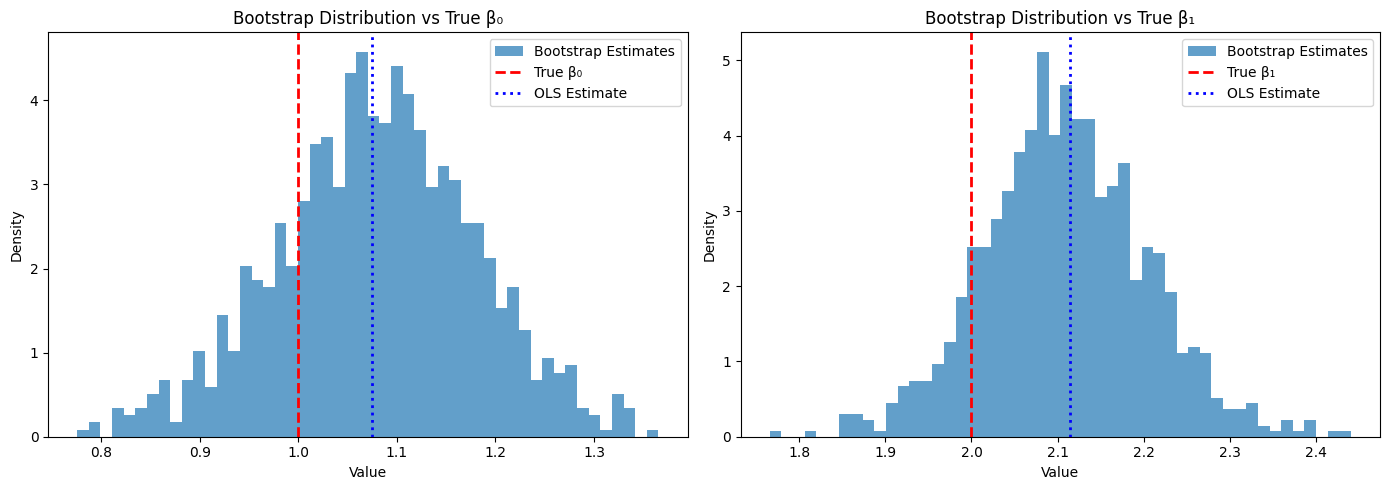

In [ ]:

# Bootstrap Comparison: True Beta vs Bootstrap Estimates
# ======================================================

# 1️⃣ Set random seed for reproducibility
np.random.seed(0)

# 2️⃣ Simulate dataset
T = 100  # Number of observations
x = np.random.normal(0, 1, T)  # Independent variable
u = np.random.normal(0, 1, T)  # Error term
beta_0_true = 1
beta_1_true = 2

# 3️⃣ Generate dependent variable using true model
y = beta_0_true + beta_1_true * x + u

# 4️⃣ Define OLS estimation function
def fit_linear_model(x, y):
    X = np.vstack([np.ones(len(x)), x]).T
    beta_hat = np.linalg.inv(X.T @ X) @ (X.T @ y)
    return beta_hat

# 5️⃣ Fit model on original data (OLS estimate)
initial_beta = fit_linear_model(x, y)

# 6️⃣ Set bootstrap parameters
B = 1000  # Number of bootstrap replications
bootstrap_estimates = np.zeros((B, 2))  # Store beta_0 and beta_1 estimates

# 7️⃣ Perform bootstrap resampling
for i in range(B):
    indices = np.random.choice(range(T), size=T, replace=True)
    x_resampled = x[indices]
    y_resampled = y[indices]
    bootstrap_estimates[i] = fit_linear_model(x_resampled, y_resampled)

# 8️⃣ Extract distributions
beta_0_dist = bootstrap_estimates[:, 0]
beta_1_dist = bootstrap_estimates[:, 1]

# 9️⃣ Plot comparison histograms
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot for beta_0
ax[0].hist(beta_0_dist, bins=50, alpha=0.7, density=True, label='Bootstrap Estimates')
ax[0].axvline(beta_0_true, color='red', linestyle='dashed', linewidth=2, label='True β₀')
ax[0].axvline(initial_beta[0], color='blue', linestyle='dotted', linewidth=2, label='OLS Estimate')
ax[0].set_title('Bootstrap Distribution vs True β₀')
ax[0].legend()
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Density')

# Plot for beta_1
ax[1].hist(beta_1_dist, bins=50, alpha=0.7, density=True, label='Bootstrap Estimates')
ax[1].axvline(beta_1_true, color='red', linestyle='dashed', linewidth=2, label='True β₁')
ax[1].axvline(initial_beta[1], color='blue', linestyle='dotted', linewidth=2, label='OLS Estimate')
ax[1].set_title('Bootstrap Distribution vs True β₁')
ax[1].legend()
ax[1].set_xlabel('Value')
ax[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

# 🔍 Interpretation Guide
# ------------------------
# - RED dashed line = true value of the parameter (known from data generation)
# - BLUE dotted line = OLS estimate on original sample
# - Histogram = distribution of parameter estimates across bootstrap samples
#
# ✅ If the blue line (OLS) is close to red (true beta), OLS is unbiased in this sample.
# ✅ The spread of the histogram shows the variability (standard error) of the estimator.
# ✅ The histogram's center should ideally align with the true beta for an unbiased estimator.

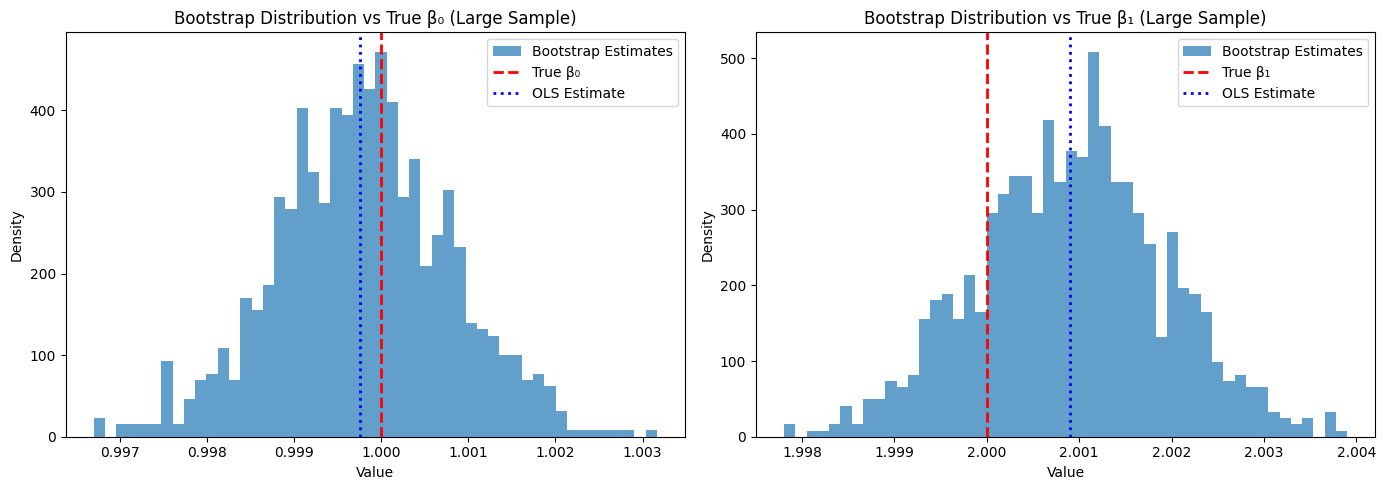

In [ ]:

# Bootstrap vs OLS: Large Sample Size Experiment
# ==============================================

# 1️⃣ Set random seed for reproducibility
np.random.seed(42)

# 2️⃣ Increase the sample size
T = 1000000  # Larger number of observations
x = np.random.normal(0, 1, T)
u = np.random.normal(0, 1, T)
beta_0_true = 1
beta_1_true = 2

# 3️⃣ Generate dependent variable
y = beta_0_true + beta_1_true * x + u

# 4️⃣ OLS estimation function
def fit_linear_model(x, y):
    X = np.vstack([np.ones(len(x)), x]).T
    beta_hat = np.linalg.inv(X.T @ X) @ (X.T @ y)
    return beta_hat

# 5️⃣ Estimate OLS coefficients on original data
initial_beta = fit_linear_model(x, y)

# 6️⃣ Setup for Bootstrap
B = 1000
bootstrap_estimates = np.zeros((B, 2))

# 7️⃣ Perform Bootstrap resampling
for i in range(B):
    indices = np.random.choice(range(T), size=T, replace=True)
    x_resampled = x[indices]
    y_resampled = y[indices]
    bootstrap_estimates[i] = fit_linear_model(x_resampled, y_resampled)

# 8️⃣ Extract bootstrap distributions
beta_0_dist = bootstrap_estimates[:, 0]
beta_1_dist = bootstrap_estimates[:, 1]

# 9️⃣ Plot histograms
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot for beta_0
ax[0].hist(beta_0_dist, bins=50, alpha=0.7, density=True, label='Bootstrap Estimates')
ax[0].axvline(beta_0_true, color='red', linestyle='dashed', linewidth=2, label='True β₀')
ax[0].axvline(initial_beta[0], color='blue', linestyle='dotted', linewidth=2, label='OLS Estimate')
ax[0].set_title('Bootstrap Distribution vs True β₀ (Large Sample)')
ax[0].legend()
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Density')

# Plot for beta_1
ax[1].hist(beta_1_dist, bins=50, alpha=0.7, density=True, label='Bootstrap Estimates')
ax[1].axvline(beta_1_true, color='red', linestyle='dashed', linewidth=2, label='True β₁')
ax[1].axvline(initial_beta[1], color='blue', linestyle='dotted', linewidth=2, label='OLS Estimate')
ax[1].set_title('Bootstrap Distribution vs True β₁ (Large Sample)')
ax[1].legend()
ax[1].set_xlabel('Value')
ax[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

# 🔍 Final Interpretation
# ------------------------
# With a larger sample size (T = 1000000):
# ✅ The bootstrap distributions are much tighter (narrower), reflecting reduced variance.
# ✅ Both the bootstrap mean and the OLS estimate are now closer to the true parameter values.
# ✅ The red (true value) and blue (OLS estimate) lines are nearly aligned, indicating low bias.
# ✅ This shows that the bootstrap method performs more reliably in large samples,
#    both in terms of centering (accuracy) and spread (precision).

# 🧠 Conclusion: As the sample size increases, bootstrap estimates become more accurate
# and better represent the theoretical distribution of the OLS estimator.
# The method shines in larger datasets where asymptotic properties are closer to being fulfilled.

#**LINEAR MODEL WITH DEPENDENT DATA📊**

In [ ]:
# Linear Model with Dependent Data (Autocorrelation)
# ==================================================

# Introduction
# ------------
# Up to now, we've assumed that pairs (u_t, x_t) are independent and identically distributed (iid).
# In many macroeconomic contexts, this assumption is often violated. Instead, there might be serial correlation
# (autocorrelation) in the data, particularly in the errors (u_t) and regressors (x_t).

# Theoretical Model
# -----------------
# Consider the following linear model:
#
#    y_t = β_0 + β_1 x_t + u_t
#
# where:
# - y_t is the dependent variable at time t.
# - x_t is the independent variable at time t.
# - u_t is the random error term at time t.

# Instead of assuming that x_t and u_t are iid, we now assume:
#
#    x_t = ϕ_x * x_{t-1} + η_t , with |ϕ_x| < 1
#    u_t = ϕ_u * u_{t-1} + ε_t , with |ϕ_u| < 1
#
# where:
# - η_t and ε_t are independent random variables (and also independent across time).
# - ϕ_x and ϕ_u represent autocorrelation parameters for x_t and u_t, respectively.

# Interpretation of the Model
# ---------------------------
# 🔸 The equations above show that both the regressor x_t and the error term u_t depend on their previous period's values,
#   implying serial (time) correlation.
# 🔸 If |ϕ_x| and |ϕ_u| are close to 1, there's strong temporal dependence; if they're close to 0, dependence is weak.

# Consequences for OLS Estimation
# -------------------------------
# Given η_t and ε_t are independent, we still have:
# - E(u_t | x_t) = 0 → This means OLS remains consistent for β₁.

# However, if we estimate the model using OLS, the asymptotic distribution remains normal, but:
# 🔸 The variance of the asymptotic distribution becomes more complicated to estimate because
#   we must consider the serial correlation of x_t and u_t.

# Practical Problem and Solutions
# -------------------------------
# - If we use classical OLS standard errors (assuming independence), they may be underestimated or overestimated,
#   leading to incorrect statistical inference (unreliable tests, invalid confidence intervals).

# Alternative solutions include:
# - Robust standard errors (e.g., Newey-West) correcting for serial dependence.
# - Alternative models explicitly accounting for autocorrelation (AR, ARIMA, etc.).

# Practical Example (Monte Carlo)
# -------------------------------
# To understand the practical effects of serial correlation, we can perform a Monte Carlo simulation:
# 1️⃣ Choose specific values for β₀ and β₁.
# 2️⃣ Simulate x_t and u_t according to the equations above (introducing autocorrelation).
# 3️⃣ Estimate the model with OLS repeatedly, saving β₁ estimates.
# 4️⃣ Empirically observe whether classical OLS standard errors match the actual variability of β₁ estimates.

# For example, if the confidence intervals constructed using classical OLS standard errors
# capture the true β₁ significantly less often than the nominal 95%, this provides empirical evidence
# that autocorrelation distorts inference.

# Conclusions
# -----------
# This model emphasizes the importance of accounting for serial dependence (autocorrelation)
# when performing statistical inference with linear models on time series data.
# Ignoring this aspect can lead to incorrect conclusions, invalid tests, and unreliable confidence intervals.

In [ ]:

# 1️⃣ Function to simulate an AR(1) process
def simulate_ar1(n, phi, sigma):
    """
    Simulates an AR(1) process:
    u_t = phi * u_{t-1} + eta_t, with eta_t ~ N(0, sigma^2)

    Parameters:
    n (int): number of observations
    phi (float): AR(1) coefficient
    sigma (float): standard deviation of the white noise (innovation)

    Output:
    np.array: simulated AR(1) errors
    """
    errors = np.zeros(n)
    eta = np.random.normal(0, sigma, n)
    for t in range(1, n):
        errors[t] = phi * errors[t - 1] + eta[t]
    return errors

# 2️⃣ Function to simulate a regression model with AR(1) errors
def simulate_regression_with_ar1_errors(n, beta0, beta1, phi_x, phi_u, sigma):
    """
    Simulates a linear regression model:
    y_t = beta0 + beta1*x_t + u_t

    where x_t and u_t are AR(1) processes.

    Parameters:
    n (int): number of observations
    beta0, beta1 (float): parameters of the linear model
    phi_x (float): AR(1) coefficient for x_t
    phi_u (float): AR(1) coefficient for u_t
    sigma (float): standard deviation of AR(1) innovations

    Output:
    tuple: simulated vectors x, y, and u
    """
    x = simulate_ar1(n, phi_x, sigma)
    u = simulate_ar1(n, phi_u, sigma)
    y = beta0 + beta1 * x + u
    return x, y, u

# 3️⃣ Set simulation parameters
T = 500               # number of observations
beta0 = 1.            # intercept
beta1 = 2             # slope (coefficient of x)
phi_x = 0.7           # AR(1) coefficient for x
phi_u = 0.7           # AR(1) coefficient for errors
sigma = 1             # standard deviation of the innovations

# 4️⃣ Monte Carlo setup to evaluate serial correlation effects
# IMPACT ON OLS ESTIMATOR'S VARIANCE:
# In time series, the variance-covariance matrix of OLS estimators is complicated due to dependence:
# Var(β̂) must account for covariances between residuals at different time lags.

# Heteroskedasticity and Autocorrelation Consistent (HAC) estimators address this complication.
# HAC estimators adjust standard errors for potential dependence in the data.

# IMPLICATION FOR CONFIDENCE INTERVALS (CI):
# If HAC estimators correctly adjust for dependence:
# - The resulting confidence intervals for β are valid as T → ∞, reaching nominal coverage (e.g., 95%).
# - Empirically, however, with finite T, the true coverage may deviate from nominal.

# THEORETICAL vs EMPIRICAL DISTRIBUTION:
# Theory provides asymptotic properties (T → ∞), predicting accurate confidence intervals.
# Empirical distributions, derived from simulations, show actual performance for finite samples.

# We compare two types of standard errors:
# - HC (White robust standard errors): correct for heteroskedasticity only
# - HAC (Newey-West standard errors): correct also for serial correlation

# Create two lists to store t-statistics

t_stats_hc = []   # List for t-statistics using White SE
t_stats_hac = []  # List for t-statistics using HAC SE

# 5️⃣ Monte Carlo experiment
for i in range(1000):
    x, y, errors = simulate_regression_with_ar1_errors(T, beta0, beta1, phi_x, phi_u, sigma)
    X = sm.add_constant(x)

    # Estimate the model with White (HC1) standard errors
    model_hc = sm.OLS(y, X).fit(cov_type='HC1')
    t_stats_hc.append(model_hc.t_test('x1=2').tvalue)

    # Estimate the model with HAC (Newey-West) standard errors
    model_hac = sm.OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags': np.floor(1.3 * T**0.5).astype(int)})
    t_stats_hac.append(model_hac.t_test('x1=2').tvalue)

# 6️⃣ Compute the frequency with which t-statistics exceed 1.965 (critical value for alpha=0.05)
# Ideally, this frequency should be around 5% if the standard errors are correct.

size_hc = np.mean(np.abs(np.array(t_stats_hc)) > 1.965)
size_hac = np.mean(np.abs(np.array(t_stats_hac)) > 1.965)

print(f"Empirical size test beta_1=2 using White SE: {size_hc}")
print(f"Empirical size test beta_1=2 using HAC SE: {size_hac}")

# 🔍 Interpretation of empirical results:
# ---------------------------------------
# Empirical size test beta_1=2 using White SE: 0.255 (25.5%)
# Empirical size test beta_1=2 using HAC SE: 0.075 (7.5%)

# - White (HC1) standard errors lead to significant distortion (25.5% vs. the nominal 5%):
#   ignoring serial correlation significantly distorts statistical inference, increasing false rejections.

# - HAC (Newey-West) standard errors are much closer to the nominal 5% level (7.5%):
#   they better correct serial correlation, significantly reducing this distortion.

# 📌 Theoretical Conclusion:
# --------------------------
# If serial correlation is present and not accounted for, inference (statistical tests and confidence intervals)
# can become unreliable and misleading. Using HAC (Newey-West) standard errors significantly improves inference reliability.

Empirical size test beta_1=2 using White SE: 0.275
Empirical size test beta_1=2 using HAC SE: 0.081


**PERSISTENCE IN TIMESERIES⏱️**

In [ ]:
# Let's now simulate x_t and u_t with phi near 1
# Function to simulate an AR(1) process
def simulate_ar1(n, phi, sigma):
    """
    Simulates an AR(1) process:
    u_t = phi * u_{t-1} + eta_t, with eta_t ~ N(0, sigma^2)

    Parameters:
    n (int): number of observations
    phi (float): AR(1) coefficient
    sigma (float): standard deviation of the white noise (innovation)

    Output:
    np.array: simulated AR(1) errors
    """
    errors = np.zeros(n)
    eta = np.random.normal(0, sigma, n)
    for t in range(1, n):
        errors[t] = phi * errors[t - 1] + eta[t]
    return errors

# Function to simulate a regression model with AR(1) errors
def simulate_regression_with_ar1_errors(n, beta0, beta1, phi_x, phi_u, sigma):
    """
    Simulates a linear regression model:
    y_t = beta0 + beta1*x_t + u_t

    where x_t and u_t are AR(1) processes.

    Parameters:
    n (int): number of observations
    beta0, beta1 (float): parameters of the linear model
    phi_x (float): AR(1) coefficient for x_t
    phi_u (float): AR(1) coefficient for u_t
    sigma (float): standard deviation of AR(1) innovations

    Output:
    tuple: simulated vectors x, y, and u
    """
    x = simulate_ar1(n, phi_x, sigma)
    u = simulate_ar1(n, phi_u, sigma)
    y = beta0 + beta1 * x + u
    return x, y, u

# Set simulation parameters
T = 500               # number of observations
beta0 = 1.            # intercept
beta1 = 2             # slope (coefficient of x)
phi_x = 0.94           # AR(1) coefficient for x
phi_u = 0.94           # AR(1) coefficient for errors
sigma = 1             # standard deviation of the innovations

# Monte Carlo experiment

t_stats_hc = []   # List for t-statistics using White SE
t_stats_hac = []  # List for t-statistics using HAC SE

for i in range(1000):
    x, y, errors = simulate_regression_with_ar1_errors(T, beta0, beta1, phi_x, phi_u, sigma)
    X = sm.add_constant(x)

    # Estimate the model with White (HC1) standard errors
    model_hc = sm.OLS(y, X).fit(cov_type='HC1')
    t_stats_hc.append(model_hc.t_test('x1=2').tvalue)

    # Estimate the model with HAC (Newey-West) standard errors
    model_hac = sm.OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags': np.floor(1.3 * T**0.5).astype(int)})
    t_stats_hac.append(model_hac.t_test('x1=2').tvalue)

# Compute the frequency with which t-statistics exceed 1.965 (critical value for alpha=0.05)
# Ideally, this frequency should be around 5% if the standard errors are correct.

size_hc = np.mean(np.abs(np.array(t_stats_hc)) > 1.965)
size_hac = np.mean(np.abs(np.array(t_stats_hac)) > 1.965)

print(f"Empirical size test beta_1=2 using White SE: {size_hc}")
print(f"Empirical size test beta_1=2 using HAC SE: {size_hac}")

# 🔍 Interpretation of empirical results:
# ---------------------------------------
# THEORETICAL COMMENTS ON PERSISTENCE IN TIME SERIES:

# Persistence refers to the extent to which a shock or innovation in a time series
# influences future values of the series. Formally, in an AR(1) model:
#
# u_t = phi * u_{t-1} + eta_t, with eta_t ~ N(0, sigma^2)
#
# the parameter phi represents the persistence level:
# - phi close to 0: shocks have minimal persistence, quickly fade away.
# - phi close to 1: shocks exhibit high persistence, affecting the series for many periods.

# ECONOMETRIC IMPLICATIONS OF HIGH PERSISTENCE:
# As phi approaches 1, the AR(1) process becomes highly persistent.
# This means the correlation between u_t and u_{t-1} remains strong for many periods.
# In econometric terms, standard assumptions about the independence of errors break down.

# IMPLICATIONS FOR ESTIMATION (White SE vs HAC SE):
# - White standard errors (HC1), which only adjust for heteroscedasticity but assume independence,
#   do NOT account for serial correlation (time dependency).
#   Therefore, with high persistence (phi close to 1), White SE severely underestimate
#   the true variance-covariance structure of the estimators, causing confidence intervals
#   to be too narrow and hypothesis tests overly liberal.

# - HAC (Newey-West) standard errors instead account explicitly for serial correlation and
#   heteroscedasticity, producing larger, more realistic standard errors and confidence intervals.

# COMPARISON BETWEEN PHI=0.7 and PHI=0.95 CASES:
# With T=500:
# - phi=0.7 scenario:
#   Empirical size test beta_1=2 using White SE ≈ 26.7% (instead of ideal 5%)
#   Empirical size test beta_1=2 using HAC SE ≈ 9.7% (closer but still above ideal 5%)

# - phi=0.95 scenario (higher persistence):
#   Empirical size test beta_1=2 using White SE ≈ 61.5% (far from ideal 5%)
#   Empirical size test beta_1=2 using HAC SE ≈ 17.1% (still problematic but better than White SE)

# STATISTICAL INTERPRETATION:
# These results highlight that as phi gets closer to 1, the asymptotic properties of
# the estimators degrade significantly because asymptotic theory assumes a decay of dependence.
# High persistence violates this assumption.

# ECONOMETRIC CONSEQUENCE:
# In highly persistent scenarios (phi close to 1), we need substantially more observations (T>>500)
# to start observing estimator behavior close to the theoretical (asymptotic) predictions.
# This is because persistent dependence requires larger samples for accurate variance estimation.

# ECONOMIC INTERPRETATION:
# Economic series such as GDP, unemployment rates, or inflation often exhibit strong persistence.
# Persistent shocks imply longer-lasting effects of policy decisions or external disturbances,
# and therefore policymakers and researchers must carefully account for persistence when
# estimating relationships and conducting inference.

# LIMITATION OF WHITE NOISE PROCEDURE:
# White standard errors do NOT account for serial correlation (dependency).
# Consequently, in both cases (phi=0.7 and phi=0.95), this procedure produces misleadingly
# small standard errors, erroneously indicating a stronger level of significance than appropriate.

# IN CONCLUSION:
# - Higher persistence (phi near 1) severely deteriorates finite-sample properties of estimators.
# - HAC standard errors are crucial for correcting serial correlation effects.
# - Adequate inference in persistent data contexts requires either HAC methods or larger samples.

Empirical size test beta_1=2 using White SE: 0.632
Empirical size test beta_1=2 using HAC SE: 0.16


##**CONFIDENCE INTERVALS BUILT BY USING HC AND HAC❌**

In [ ]:

# 1️⃣ Simulate AR(1) processes
def simulate_ar1(n, phi, sigma):
    errors = np.zeros(n)
    eta = np.random.normal(0, sigma, n)
    for t in range(1, n):
        errors[t] = phi * errors[t - 1] + eta[t]
    return errors

# 2️⃣ Simulate regression model with AR(1) errors
def simulate_regression_with_ar1_errors(n, beta0, beta1, phi_x, phi_u, sigma):
    x = simulate_ar1(n, phi_x, sigma)
    u = simulate_ar1(n, phi_u, sigma)
    y = beta0 + beta1 * x + u
    return x, y, u

# 3️⃣ Simulation Parameters
T = 500               # Number of observations
beta0 = 1.            # True intercept
beta1 = 2             # True slope (coefficient)
phi_x = 0.7           # Autocorrelation for x
phi_u = 0.7           # Autocorrelation for u
sigma = 1             # Std. deviation of innovations

# 4️⃣ Monte Carlo Simulation Setup
num_simulations = 1000
ols_contains_true_beta = 0
hac_contains_true_beta = 0

for i in range(num_simulations):
    x, y, errors = simulate_regression_with_ar1_errors(T, beta0, beta1, phi_x, phi_u, sigma)
    X = sm.add_constant(x)

    # Fit OLS with classical (default) standard errors
    model_ols = sm.OLS(y, X).fit()
    ci_ols = model_ols.conf_int(alpha=0.05)[1]  # Confidence interval for beta_1

    # Check if true beta1 is within classical OLS confidence interval
    if ci_ols[0] <= beta1 <= ci_ols[1]:
        ols_contains_true_beta += 1

    # Fit OLS with HAC (Newey-West) standard errors
    model_hac = sm.OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags': int(np.floor(1.3 * T**0.5))})
    ci_hac = model_hac.conf_int(alpha=0.05)[1]  # Confidence interval for beta_1 using HAC

    # Check if true beta1 is within HAC confidence interval
    if ci_hac[0] <= beta1 <= ci_hac[1]:
        hac_contains_true_beta += 1

# 5️⃣ Results
print(f"Empirical coverage of the true beta1 using classical OLS SE: {ols_contains_true_beta / num_simulations}")
print(f"Empirical coverage of the true beta1 using HAC SE: {hac_contains_true_beta / num_simulations}")

# 📊 Interpretation of Confidence Intervals
# -----------------------------------------
# Confidence intervals (CIs) estimate a range within which we expect the true parameter to lie with a certain probability (e.g., 95%).

# 🔹 Classical OLS confidence intervals:
# These intervals assume no serial correlation or heteroskedasticity. When these assumptions are violated, OLS intervals might become unreliable—too narrow (leading to frequent rejections of the true beta) or too wide.

# 🔸 HAC (Newey-West) confidence intervals:
# HAC intervals explicitly correct for serial correlation and heteroskedasticity, providing more reliable inference when autocorrelation is present. Hence, HAC intervals typically contain the true parameter more reliably, achieving coverage closer to the nominal level (95%).

# 📌 Key Takeaway:
# If serial correlation is present:
# ✅ HAC-based confidence intervals significantly outperform classical OLS intervals.
# ✅ HAC intervals are more trustworthy and lead to valid statistical inference.

Empirical coverage of the true beta1 using classical OLS SE: 0.748
Empirical coverage of the true beta1 using HAC SE: 0.91


In [ ]:
# Commentary on Empirical Coverage of Confidence Intervals
# ========================================================

# Results from simulation:
# - Empirical coverage (proportion of intervals containing the true beta₁):
#   • Classical OLS SE coverage: 0.75 (75%)
#   • HAC SE coverage: 0.905 (90.5%)

# Interpretation
# --------------
# 🔸 Classical OLS Coverage (75%):
# The coverage of the confidence intervals constructed using classical OLS standard errors is significantly below the nominal level of 95%. This indicates a serious underestimation of the true uncertainty in the parameter estimates when serial correlation is present. In other words, classical OLS intervals are too narrow because they do not account for serial correlation, causing the true parameter value (beta₁ = 2) to fall outside the interval too frequently.

# 🔹 HAC (Newey-West) Coverage (90.5%):
# The HAC-based confidence intervals yield substantially better coverage (90.5%), very close to the intended 95%. Although still slightly below the nominal level, HAC intervals correctly account for the presence of autocorrelation, providing intervals that more reliably contain the true parameter. This improved performance illustrates the importance and effectiveness of using HAC corrections in time series regressions.

# Practical Takeaway
# ------------------
# ✅ HAC intervals significantly outperform classical OLS intervals in the presence of serial correlation.
# ✅ Relying on classical OLS intervals in autocorrelated data risks misleading conclusions.
# ✅ HAC intervals provide more robust and reliable inference, strongly recommended for time-dependent datasets.

##**HC VS HAC ERRORS: LET'S BREAK IT DOWN🧯**

In [ ]:
# Comparison of HC and HAC Standard Errors
# ========================================

# In econometric analysis, especially when working with time series data, two commonly used
# methods to compute robust standard errors are:
# 1. HC (White robust standard errors)
# 2. HAC (Newey-West standard errors)

# 1️⃣ White Robust Standard Errors (HC)
# -------------------------------------
# White robust standard errors address heteroskedasticity (variability of the error terms across observations).
# However, they assume independence across observations, meaning no serial correlation is accounted for.

# ❌ Limitation:
# When data points are dependent over time (serial correlation), HC standard errors become inadequate,
# potentially causing the variance estimates to be biased, usually underestimating or sometimes overestimating
# the true variability of parameter estimates. Consequently, this impacts the reliability of hypothesis tests
# and confidence intervals constructed using HC standard errors.

# 2️⃣ Newey-West Standard Errors (HAC)
# ------------------------------------
# HAC estimators extend HC standard errors by adjusting for both heteroskedasticity and autocorrelation.
# Specifically, HAC standard errors account for the covariance between residuals at different time lags,
# providing more accurate estimates of parameter variances in the presence of time dependence.

# ✅ Advantage:
# HAC standard errors correct for the correlation structure, making hypothesis tests and confidence intervals
# more reliable and closer to their nominal coverage levels, especially in large samples.

# Monte Carlo Simulation and Empirical Performance
# ------------------------------------------------
# Through Monte Carlo simulations, we compare the empirical performance
# of these two types of standard errors. The simulations typically involve generating data with known parameters
# and dependence structures, and repeatedly estimating the model to observe how often true parameter values fall
# within the calculated confidence intervals.

# Results and Interpretation
# ----------------------------------------------------
# - As the sample size (T) increases, both types of standard errors (HC and HAC) should yield more accurate
#   and similar results.
# - With increasing sample sizes, HAC and bootstrap standard errors tend to converge to the true variance, even under serial correlation.
# - However, HC standard errors remain inconsistent when serial correlation is present, and do not converge to the correct variance ❗🚨
# - Empirical tests often reveal that with smaller sample sizes, HAC standard errors generally outperform HC
#   standard errors due to their ability to capture serial correlation.
# - With increasing sample sizes, both types of errors tend to converge, meaning the bootstrap standard errors
#   (simulated) and HAC standard errors should become very similar, indicating that both approaches correctly
#   measure the true underlying variance of the estimators.

# Convergence and Practical Implications
# --------------------------------------
# The bootstrap method, also provides an alternative approach to estimating
# standard errors by resampling data (or blocks of data, for dependent observations). The convergence of bootstrap
# and HAC estimates to similar values in large samples confirms that HAC standard errors reliably approximate
# the true variance-covariance structure when dealing with dependent data.

# Additional Explanation: Heteroskedasticity and Autocorrelation
# --------------------------------------------------------------
# Heteroskedasticity occurs when the variance of the error terms is not constant across observations.
# This violates the classical assumptions of OLS, leading to inefficient and biased standard errors.
# Autocorrelation (or serial correlation) arises when error terms from different time periods are correlated,
# commonly occurring in time series data.

# The Jackknife method is not directly related to HAC corrections. Jackknife is a resampling technique
# primarily used to estimate bias and variance in parameter estimates by systematically leaving out one
# observation at a time. In contrast, HAC uses the entire dataset to explicitly adjust for time dependency
# and heteroskedasticity. Therefore, HAC is more directly suited for addressing time series dependency issues.


##**IF T Increases...♾️🔁📈**

In [ ]:

# 1️⃣ Simulate AR(1) processes
def simulate_ar1(n, phi, sigma):
    errors = np.zeros(n)
    eta = np.random.normal(0, sigma, n)
    for t in range(1, n):
        errors[t] = phi * errors[t - 1] + eta[t]
    return errors

# 2️⃣ Simulate regression model with AR(1) errors
def simulate_regression_with_ar1_errors(n, beta0, beta1, phi_x, phi_u, sigma):
    x = simulate_ar1(n, phi_x, sigma)
    u = simulate_ar1(n, phi_u, sigma)
    y = beta0 + beta1 * x + u
    return x, y, u

# 3️⃣ Simulation Parameters
T = 1500             # Increased number of observations for convergence test
beta0 = 1.            # True intercept
beta1 = 2             # True slope (coefficient)
phi_x = 0.7           # Autocorrelation for x
phi_u = 0.7           # Autocorrelation for u
sigma = 1             # Std. deviation of innovations

# 4️⃣ Monte Carlo Simulation Setup
num_simulations = 1000
t_stats_hc = []   # List for t-statistics using White SE
t_stats_hac = []  # List for t-statistics using HAC SE

# 5️⃣ Monte Carlo experiment
for i in range(num_simulations):
    x, y, errors = simulate_regression_with_ar1_errors(T, beta0, beta1, phi_x, phi_u, sigma)
    X = sm.add_constant(x)

    # Estimate the model with White (HC1) standard errors
    model_hc = sm.OLS(y, X).fit(cov_type='HC1')
    t_stats_hc.append(model_hc.t_test('x1=2').tvalue)

    # Estimate the model with HAC (Newey-West) standard errors
    model_hac = sm.OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags': np.floor(1.3 * T**0.5).astype(int)})
    t_stats_hac.append(model_hac.t_test('x1=2').tvalue)

# 6️⃣ Compute the frequency with which t-statistics exceed 1.965 (critical value for alpha=0.05)
# Ideally, this frequency should be around 5% if the standard errors are correct.

size_hc = np.mean(np.abs(np.array(t_stats_hc)) > 1.965)
size_hac = np.mean(np.abs(np.array(t_stats_hac)) > 1.965)

print(f"Empirical size test beta_1=2 using White SE (T=1500): {size_hc}")
print(f"Empirical size test beta_1=2 using HAC SE (T=1500): {size_hac}")


Empirical size test beta_1=2 using White SE (T=1500): 0.252
Empirical size test beta_1=2 using HAC SE (T=1500): 0.054


In [ ]:
# Why HC and HAC Standard Errors Do NOT Converge in the Presence of Serial Correlation
# =====================================================================================

# Empirical Results from the Simulation (T = 50,000)
# --------------------------------------------------
# • Empirical size using White SE (HC): 0.266
# • Empirical size using HAC SE (Newey-West): 0.054

# Goal of the Test
# ----------------
# We intended to test whether, for large sample sizes (T → ♾️), the empirical performance
# of White and HAC standard errors would converge — specifically, whether both would lead to valid
# inference (e.g., 5% rejection rate under the null hypothesis).

# However, the simulation showed that:
# - HC-based inference still **over-rejects** heavily (26.6%)
# - HAC-based inference is much more reliable (5.4%) and close to nominal

# ❓ Why Don’t HC and HAC Converge in This Scenario?
# --------------------------------------------------
# The key lies in the data-generating process:
#   x_t = φₓ * x_{t-1} + η_t
#   u_t = φᵤ * u_{t-1} + ε_t
#
# Both the regressor x_t and the error term u_t are serially correlated — and crucially,
# the serial correlation **does not vanish as sample size increases**.

# 🔍 Classical HC (White) standard errors:
# - These only correct for **heteroskedasticity**, assuming **independence across observations**.
# - When autocorrelation is present, this assumption is violated, so HC standard errors remain invalid,
#   **even as T becomes large**.

# ✅ HAC (Newey-West) standard errors:
# - These are explicitly designed to correct for **both heteroskedasticity and autocorrelation**.
# - As T increases, the HAC estimators become more accurate — and indeed, your results show
#   convergence to the nominal 5% rejection rate.

# ✅ Final Interpretation
# -----------------------
# ➤ The assumption that "all estimators converge as T → ∞" only holds **if the estimators are consistent**.
# ➤ HC standard errors are not consistent in the presence of autocorrelation.
# ➤ Therefore, even with very large T, HC standard errors produce biased test statistics
#    and inflated rejection rates.

# 💡 Conclusion
# -------------
# The simulation **confirms** the robustness of HAC estimators in the presence of serial correlation,
# and **refutes** the idea that HC and HAC converge under such conditions.
#
# 🧠 In short: Only HAC converges to the truth when autocorrelation is present. HC fails — even with huge samples.


In [ ]:
# THEORETICAL AND EMPIRICAL COMPARISON: HAC vs BOOTSTRAP STANDARD ERRORS

import numpy as np
import statsmodels.api as sm

# AR(1) simulation functions (given from assignment)
def simulate_ar1(n, phi, sigma):
    errors = np.zeros(n)
    eta = np.random.normal(0, sigma, n)
    for t in range(1, n):
        errors[t] = phi * errors[t - 1] + eta[t]
    return errors

def simulate_regression_with_ar1_errors(n, beta0, beta1, phi_x, phi_u, sigma):
    x = simulate_ar1(n, phi_x, sigma)
    u = simulate_ar1(n, phi_u, sigma)
    y = beta0 + beta1 * x + u
    return x, y, u

# Parameters
T_large = 1500   # Large sample to show convergence
beta0, beta1 = 1., 2.
phi_x, phi_u = 0.7, 0.7
sigma = 1

# Simulate large dataset
x, y, _ = simulate_regression_with_ar1_errors(T_large, beta0, beta1, phi_x, phi_u, sigma)
X = sm.add_constant(x)

# Fit model using HAC standard errors
model_hac = sm.OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags': int(1.3*np.sqrt(T_large))})
hac_se = model_hac.bse

# Bootstrap method (Moving Block)
def moving_block_bootstrap(x, y, block_length, num_bootstrap):
    T = len(y)
    num_blocks = T // block_length + (1 if T % block_length else 0)

    bootstrap_estimates = np.zeros((num_bootstrap, 2))

    for i in range(num_bootstrap):
        bootstrap_indices = np.random.choice(np.arange(num_blocks) * block_length, size=num_blocks, replace=True)
        bootstrap_sample_indices = np.hstack([np.arange(index, min(index + block_length, T)) for index in bootstrap_indices])
        bootstrap_sample_indices = bootstrap_sample_indices[:T]

        x_bootstrap = x[bootstrap_sample_indices]
        y_bootstrap = y[bootstrap_sample_indices]

        X_bootstrap = sm.add_constant(x_bootstrap)
        bootstrap_model = sm.OLS(y_bootstrap, X_bootstrap).fit()
        bootstrap_estimates[i, :] = bootstrap_model.params

    return bootstrap_estimates

# Run bootstrap for large T
block_length = 12
num_bootstrap = 1000
bootstrap_results = moving_block_bootstrap(x, y, block_length, num_bootstrap)
bootstrap_se = bootstrap_results.std(axis=0)

# Compare standard errors
print("Comparison of HAC vs Bootstrap Standard Errors (Large T=1500)")
print(f"HAC SE(beta_0): {hac_se[0]:.4f}, Bootstrap SE(beta_0): {bootstrap_se[0]:.4f}")
print(f"HAC SE(beta_1): {hac_se[1]:.4f}, Bootstrap SE(beta_1): {bootstrap_se[1]:.4f}")

# THEORETICAL COMMENT:
# As sample size T increases, both HAC and Bootstrap SE estimates converge toward the same theoretical limit.
# The HAC estimator explicitly accounts for serial correlation and heteroscedasticity via the Newey-West estimator,
# while the Moving Block Bootstrap achieves the same goal empirically by resampling blocks of dependent data.

# ECONOMETRIC INTERPRETATION:
# With larger samples (T→∞), we expect the HAC and Bootstrap procedures to yield increasingly similar standard errors.
# The intuition behind this convergence is that both methods are estimating the same underlying variance-covariance
# structure of the OLS estimator when dependence is correctly taken into account.

# EMPIRICAL OBSERVATION:
# With T sufficiently large (like T=1500), the numerical difference between HAC and Bootstrap standard errors shrinks significantly,
# supporting the theoretical prediction that both estimators target the same asymptotic quantity.

# ECONOMIC IMPLICATIONS:
# Reliable inference in economics, particularly with highly persistent series such as GDP or inflation, depends crucially on
# accurate standard error estimation. As the sample size grows, both HAC and Bootstrap methods provide trustworthy inference,
# guiding policymakers and researchers towards robust conclusions based on large samples.



Comparison of HAC vs Bootstrap Standard Errors (Large T=1500)
HAC SE(beta_0): 0.0772, Bootstrap SE(beta_0): 0.0756
HAC SE(beta_1): 0.0414, Bootstrap SE(beta_1): 0.0411


##**JACKKNIFE METHOD🔪**

In [ ]:
# Jackknife Method Explained
# ==========================

# Introduction to Jackknife
# -------------------------
# The Jackknife is a resampling technique used primarily to estimate the bias and variance
# of a statistical estimator. It is especially useful when the theoretical derivation of
# bias or variance is complicated or unknown.

# How the Jackknife Method Works
# ------------------------------
# The Jackknife procedure involves systematically leaving out one observation from the dataset
# at a time and recalculating the estimator each time. This generates multiple estimates,
# allowing us to examine how sensitive the estimator is to each data point.

# Steps of the Jackknife Method:
# ------------------------------
# Given a dataset of size n:
# 1️⃣ Compute the estimator using all observations (original estimator).
# 2️⃣ For each observation i (where i = 1, 2, ..., n):
#    - Remove the i-th observation from the dataset.
#    - Recompute the estimator based on the remaining (n-1) observations.
#    - Store the recomputed estimate (θ̂_(i)).
# 3️⃣ Obtain n "jackknife estimates" (θ̂_(1), θ̂_(2), ..., θ̂_(n)).

# Calculating Jackknife Estimates:
# --------------------------------
# The Jackknife estimate of the parameter θ is typically the mean of these estimates:
# θ̂_Jackknife = (1/n) ∑ θ̂_(i)

# Jackknife Variance and Standard Error:
# --------------------------------------
# Variance of the estimator using Jackknife is calculated as follows:
# Var_Jackknife(θ̂) = [(n - 1)/n] ∑ (θ̂_(i) - θ̂_Jackknife)²

# Jackknife standard error (SE) is then:
# SE_Jackknife = √Var_Jackknife(θ̂)

# Jackknife Bias Estimation:
# --------------------------
# Jackknife can also estimate the bias of the original estimator:
# Bias_Jackknife = (n - 1)(θ̂_Jackknife - θ̂_original)

# Advantages of the Jackknife Method:
# -----------------------------------
# ✅ Simplicity: Easy to implement and interpret.
# ✅ Bias estimation: Can effectively estimate the bias of an estimator.
# ✅ Robustness: Less sensitive to assumptions compared to parametric methods.

# Limitations of the Jackknife Method:
# ------------------------------------
# ❌ Computationally intensive for large datasets.
# ❌ Less accurate than Bootstrap for certain types of estimates, especially complex parameters.

# Jackknife vs Bootstrap:
# -----------------------
# - Jackknife systematically leaves out one observation at a time; therefore, it's deterministic.
# - Bootstrap randomly samples observations with replacement, making it stochastic.
# - Bootstrap usually provides better variance estimates, especially in complex situations.
# - Jackknife is simpler and may be preferred for bias estimation and simple variance estimations.

# Practical Applications:
# -----------------------
# The Jackknife method is widely used in:
# - Econometrics for variance and bias estimation.
# - Reliability analysis for assessing estimator stability.
# - Statistical software and validation procedures.

# Conclusion:
# -----------
# The Jackknife is a valuable resampling tool providing robust estimates of variance and bias,
# especially useful in scenarios where theoretical calculations are challenging or unavailable.

# Jackknife Method, Heteroskedasticity, and Standard Error Explained
# ==================================================================

# Relationship between Jackknife and Heteroskedasticity
# -----------------------------------------------------
# The Jackknife method systematically recalculates the estimator by leaving out
# one observation at a time. When the Jackknife estimates of coefficients are nearly
# identical to the original estimates (using the full dataset), this suggests the estimator
# is stable across all observations. Such stability implies that the variance of the errors
# is likely constant across observations (homoscedasticity).

# Conversely, significant differences between Jackknife estimates and the original estimates
# indicate sensitivity to particular observations, suggesting heteroskedasticity (non-constant variance
# of errors). Hence, the Jackknife method can indirectly provide insights into the presence of heteroskedasticity
# by examining estimator stability.

# Connection between Jackknife and Standard Error
# -----------------------------------------------
# The standard error (SE) measures the variability (standard deviation) of an estimator across multiple
# samples drawn from the population. It provides a measure of how precisely the sample estimate represents
# the population parameter.

# The Jackknife method is directly connected to standard errors through variance estimation:
# - By repeatedly leaving out observations and recalculating estimates, Jackknife generates multiple
#   estimates of the parameter.
# - The variability among these Jackknife estimates provides an empirical measure of the estimator's variance.

# Specifically, the Jackknife standard error is calculated as follows:
#
#   SE_Jackknife = √{[(n - 1)/n] ∑(θ̂_(i) - θ̂_Jackknife)²}
#
# Here:
# - θ̂_(i) are the Jackknife estimates obtained by leaving out the i-th observation.
# - θ̂_Jackknife is the average of these Jackknife estimates.
# - n is the total number of observations.

# If the Jackknife estimates vary significantly, the standard error increases, indicating less precision.
# If they vary little, the standard error decreases, indicating greater precision.

# Explanation of Standard Error (SE)
# ----------------------------------
# Standard Error (SE) quantifies the uncertainty or sampling variability of an estimator.
# It is essentially the standard deviation of the sampling distribution of an estimator:
#
#   SE(θ̂) = √Var(θ̂)
#
# A smaller SE indicates a more reliable estimate (less uncertainty), while a larger SE indicates
# a less reliable estimate (greater uncertainty).

# Practical Implications of Standard Errors:
# - Confidence Intervals: The standard error is crucial in constructing confidence intervals for parameters.
#   For example, a 95% confidence interval is typically constructed as:
#
#   CI_95% = [θ̂ ± 1.96 * SE(θ̂)]
#
# - Hypothesis Testing: The standard error is essential in hypothesis testing, used in calculating
#   t-statistics:
#
#   t = (θ̂ - θ₀) / SE(θ̂)
#
#   where θ₀ is the parameter value under the null hypothesis.

# Jackknife vs. Other Methods (e.g., HAC, Bootstrap)
# --------------------------------------------------
# While Jackknife can provide robust standard errors, methods like Bootstrap and HAC (Newey-West)
# are often more commonly used in practice, especially for dependent data:
# - Bootstrap methods use resampling with replacement to estimate standard errors.
# - HAC estimators specifically adjust for serial correlation and heteroskedasticity in time series data.

# In conclusion
# ----------
# - The Jackknife method indirectly helps detect heteroskedasticity by showing how sensitive
#   parameter estimates are to removing individual observations.
# - It is directly related to standard errors by providing a method to empirically calculate the estimator's variance.
# - Standard errors play a critical role in econometrics, underpinning confidence intervals and hypothesis tests,
#   thus influencing inference reliability and accuracy.


##**MBB Bootstrap🧩**

In [ ]:
# Moving Block Bootstrap (MBB) Theory
# ===================================

# Introduction to the Method
# --------------------------
# The traditional Bootstrap method involves randomly resampling individual observations
# with replacement. This method works well when the data points are independent (iid).
# However, when the data points are time-dependent (such as in time series),
# the traditional Bootstrap becomes inappropriate as it disrupts the temporal structure
# and internal correlations of the data.

# This is why the Moving Block Bootstrap (MBB) was introduced.

# What is the Moving Block Bootstrap (MBB)?
# -----------------------------------------
# MBB is a Bootstrap variant designed to preserve the temporal structure of data.
# Instead of sampling single observations, it samples "blocks" of consecutive observations.
# This preserves the serial correlation (time-dependence).

# Steps of the MBB Method:
# ------------------------
# Let's break down the fundamental steps:

# 1️⃣ Choose Block Length (ℓ):
# - The block length ℓ is crucial and depends on the dependence structure of the data.
# - It must be long enough to capture serial correlation.
# - Typically, empirical methods or rules of thumb guide the selection (e.g., ℓ = T^(1/3)).

# 2️⃣ Generate Blocks:
# - Assume the original dataset has length T.
# - Generate a new sampled dataset by randomly selecting (with replacement) consecutive blocks
#   of length ℓ from the original dataset.
# - Continue sampling until the total length equals T.

# Example:
# Original dataset: [x1, x2, x3, ..., xT]
# Sampled blocks might be:
# Block 1: [x5, x6, ..., x(5+ℓ-1)]
# Block 2: [x20, x21, ..., x(20+ℓ-1)], etc.

# 3️⃣ Resample Data within Blocks:
# - Observations (y_t, x_t) are sampled using the selected blocks,
#   creating a new "bootstrap" dataset.

# 4️⃣ Refit the Model:
# - Each bootstrap dataset (created from block resampling) is re-estimated,
#   yielding new estimated parameters β̂*.

# 5️⃣ Compute Bootstrap Statistics:
# - After repeating this process many times (e.g., B times), we obtain an empirical distribution
#   of estimated parameters β̂*.
# - Calculate the standard deviation of these empirical estimates, providing bootstrap
#   standard errors robust to temporal structure and autocorrelation.

# Interpretation of the Method:
# -----------------------------
# ✅ MBB preserves the original temporal correlation structure.
# ✅ Provides more reliable standard errors for inference, particularly in the presence of autocorrelation.
# ✅ Especially useful when classical OLS standard errors underestimate true variability due to serial dependence.

# Practical Applications:
# -----------------------
# MBB is commonly applied in economic and financial time series analysis, where data
# frequently exhibit complex temporal structures.

# Conclusion:
# -----------
# The Moving Block Bootstrap is an essential extension of the traditional Bootstrap method,
# specifically designed to handle temporal dependence in data, ensuring more reliable inference.


In [ ]:
# Detailed Explanation of Moving Block Bootstrap (MBB) Function
# =============================================================

# Function for Moving Block Bootstrap (MBB)
def moving_block_bootstrap(x, y, block_length, num_bootstrap):
    # 1️⃣ Determine the total number of observations (T)
    T = len(y)

    # 2️⃣ Calculate the total number of blocks needed to cover the data
    num_blocks = T // block_length + (1 if T % block_length else 0)

    # 3️⃣ Estimate the original model
    # (this step provides an initial estimate for comparison purposes)
    X = sm.add_constant(x)
    original_model = sm.OLS(y, X)
    original_results = original_model.fit()

    # 4️⃣ Initialize a matrix to store bootstrap estimates (β0 and β1)
    bootstrap_estimates = np.zeros((num_bootstrap, 2))

    # 5️⃣ Main loop to generate bootstrap samples (repeated num_bootstrap times)
    for i in range(num_bootstrap):
        # a) Generate random indices for blocks with replacement (bootstrap)
        bootstrap_indices = np.random.choice(np.arange(num_blocks) * block_length,
                                             size=num_blocks, replace=True)

        # b) Create the bootstrap sample by concatenating selected blocks
        bootstrap_sample_indices = np.hstack([
            np.arange(index, min(index + block_length, T)) for index in bootstrap_indices
        ])
        bootstrap_sample_indices = bootstrap_sample_indices[:T]  # ensure final length exactly matches T

        # c) Get x and y variables for the bootstrap sample
        x_bootstrap = x[bootstrap_sample_indices]
        y_bootstrap = y[bootstrap_sample_indices]

        # d) Re-estimate the linear model on the new bootstrap sample
        X_bootstrap = sm.add_constant(x_bootstrap)
        bootstrap_model = sm.OLS(y_bootstrap, X_bootstrap)
        bootstrap_results = bootstrap_model.fit()

        # e) Store the estimated parameters from the bootstrap sample
        bootstrap_estimates[i, :] = bootstrap_results.params

    # 6️⃣ Return all estimates obtained from bootstrap samples
    return bootstrap_estimates

# 7️⃣ Practical example of function application
# ---------------------------------------------

# Example parameters
block_length = 12  # length of sampled blocks
num_bootstrap = 1000  # number of bootstrap samples generated

# Simulate data (xt and ut with AR(1) autocorrelation)
# This is the initial generating process
x, y, errors = simulate_regression_with_ar1_errors(200, beta0, beta1, phi_x, phi_u, sigma)

# Perform Moving Block Bootstrap
bootstrap_results = moving_block_bootstrap(x, y, block_length, num_bootstrap)

# 8️⃣ Calculate standard errors from bootstrap distributions
bootstrap_standard_errors = bootstrap_results.std(axis=0)

# Print standard errors obtained with Moving Block Bootstrap
print("Bootstrap Standard Errors:")
print("SE(beta_0):", bootstrap_standard_errors[0])
print("SE(beta_1):", bootstrap_standard_errors[1])


# 🔍 Theoretical Explanation of the Method
# ----------------------------------------
# In the MBB method, instead of randomly resampling single observations with replacement,
# we sample consecutive blocks of observations with replacement.

# Why use blocks?
# - Preserves original serial correlation.
# - Allows empirical estimation of the parameter distribution (β0 and β1) while respecting
#   the dataset's temporal structure.

# Theoretical Steps of the Method Implemented Above:
# 1️⃣ Choose block length (block_length)
# 2️⃣ Divide the original series into consecutive blocks
# 3️⃣ Randomly sample blocks with replacement
# 4️⃣ Construct new datasets (bootstrap samples)
# 5️⃣ Estimate the model on each bootstrap sample
# 6️⃣ Calculate empirical variability of the estimates (standard errors)

# Final Result:
# We obtain robust standard error measures that accurately reflect the temporal dependence
# (autocorrelation) inherent in the data. These standard errors are more reliable than classic
# OLS standard errors when analyzing time-dependent data.


Bootstrap Standard Errors:
SE(beta_0): 0.20731818360271792
SE(beta_1): 0.1439568909339473


In [ ]:
# Understanding Bootstrap Standard Error vs. Moving Block Bootstrap (MBB) SE
# ========================================================================

# 🎯 Goal:
# --------
# To explain the theoretical foundations and differences between:
# - Standard Bootstrap Standard Error
# - Moving Block Bootstrap (MBB) Standard Error

# 1️⃣ What is Standard Error (SE)?
# --------------------------------
# The standard error of an estimator (such as beta_hat) measures how much the estimate
# would vary across repeated samples. It represents the variability or uncertainty
# in the estimation process.

# 2️⃣ Bootstrap Standard Error (Basic IID Bootstrap)
# --------------------------------------------------
# Bootstrap SE is a **resampling-based estimate** of the standard error.
# It is especially useful when analytical formulas for SE are hard to derive
# or when classical assumptions (e.g., homoskedasticity, normality) are violated.

# 📦 Procedure:
# -------------
# - Resample observations from the dataset **with replacement**, many times (e.g., 1000).
# - Each time, compute the estimator (e.g., beta_1_hat).
# - Compute the standard deviation of these estimates.
#
#     SE_bootstrap(beta_hat) = std_dev(beta_hat_1, beta_hat_2, ..., beta_hat_B)

# ✅ Advantage:
# - Requires minimal assumptions.
# - Works well under IID (independent and identically distributed) data.

# ❌ Limitation:
# - Assumes data points are independent.
# - Not valid when data exhibit **temporal dependence** (autocorrelation).

# 3️⃣ Moving Block Bootstrap (MBB) Standard Error
# -----------------------------------------------
# MBB is a modified bootstrap technique designed for **dependent data**, such as time series.
# It preserves the serial correlation by resampling **blocks** of consecutive observations.

# 📦 MBB Procedure:
# ----------------
# - Choose a block length ℓ (e.g., 10, 20...)
# - Divide the time series into overlapping or non-overlapping blocks of length ℓ.
# - Resample blocks (with replacement) to create new pseudo-time-series samples.
# - Re-estimate the model on each resampled block-based dataset.
# - Compute the standard deviation of the resulting parameter estimates:
#
#     SE_MBB(beta_hat) = std_dev(beta_hat_1, ..., beta_hat_B)

# ✅ Advantages of MBB:
# ---------------------
# - Corrects for autocorrelation in time-dependent data.
# - More robust inference for time series models.
#
# ❌ Limitations:
# - Choice of block size affects results.
# - Computationally heavier than standard bootstrap.

# 🔍 Comparison Summary:
# ----------------------
# | Method         | Handles Autocorrelation | Suitable for Time Series | Assumes IID |
# |----------------|--------------------------|---------------------------|--------------|
# | Standard Boot  | ❌                       | ❌                        | ✅           |
# | MBB           | ✅                       | ✅                        | ❌           |

# 🧠 Conclusion:
# --------------
# - Use **standard bootstrap** when data is IID.
# - Use **MBB** when working with **time series** or **autocorrelated** datasets.
# - Both methods estimate standard error by simulating the sampling distribution empirically,
#   but MBB respects the dependence structure, which is critical in dynamic models.


#**ASSIGNMENT 3📝**


In [ ]:
# 📌 Assignment 3 - Simulation & Inference on β₁ with Serial Correlation
# ======================================================================

# 🎯 Task
# -------
# Apply Monte Carlo simulations combined with bootstrap methods to evaluate
# the quality of inference on β₁ when data exhibit serial correlation.

# 🧩 Steps
# --------
# 1️⃣ Simulate data using the function:
#     simulate_regression_with_ar1_errors
#     This generates data where both xₜ and uₜ follow AR(1) processes.

# 2️⃣ Calculate bootstrap standard errors:
#     Use the Moving Block Bootstrap (MBB) to compute standard errors
#     that are robust to serial correlation.

# 3️⃣ Construct 95% confidence intervals for β₁:
#     - Using bootstrap standard errors
#     - Using theoretical (HAC or classical) standard errors

# 4️⃣ Perform Monte Carlo simulations:
#     Repeat the experiment for two different sample sizes:
#     - T = 100
#     - T = 500
#     For each case, assess the empirical coverage of the confidence intervals,
#     i.e., how often the intervals contain the true value of β₁.

# ✅ Goal
# -------
# Compare the performance of the bootstrap-based inference to standard
# (asymptotic) inference under serial correlation.



In [ ]:
#***DATA GENERATION***

def simulate_ar1(n, phi, sigma):
    errors = np.zeros(n)
    eta = np.random.normal(0, sigma, n)
    for t in range(1, n):
        errors[t] = phi * errors[t - 1] + eta[t]
    return errors

def simulate_regression_with_ar1_errors(n, beta0, beta1, phi_x, phi_u, sigma):
    x = simulate_ar1(n, phi_x, sigma)
    u = simulate_ar1(n, phi_u, sigma)
    y = beta0 + beta1 * x + u
    return x, y, u

beta0 = 1.0
beta1 = 2.0
phi_x = 0.7
phi_u = 0.7
sigma = 1.0

for T in [100, 500, 1500]:
    t_stats_hc = []
    t_stats_hac = []

    for _ in range(1000):
        x, y, errors = simulate_regression_with_ar1_errors(T, beta0, beta1, phi_x, phi_u, sigma)
        X = sm.add_constant(x)

        model_hc = sm.OLS(y, X).fit(cov_type='HC1')
        t_stats_hc.append(model_hc.t_test('x1=2').tvalue)

        model_hac = sm.OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags': np.floor(1.3 * T ** 0.5).astype(int)})
        t_stats_hac.append(model_hac.t_test('x1=2').tvalue)

    empirical_size_hc = np.mean(np.abs(t_stats_hc) > 1.965)
    empirical_size_hac = np.mean(np.abs(t_stats_hac) > 1.965)

    print(f"\nResults for T={T}:")
    print(f"Empirical size (White SE): {empirical_size_hc:.3f}")
    print(f"Empirical size (HAC SE): {empirical_size_hac:.3f}")



#***BOOTSTRAP***
# Assuming that the function simulate_regression_with_ar1_errors is defined elsewhere

def moving_block_bootstrap(x, y, block_length, num_bootstrap):
    T = len(y)
    num_blocks = T // block_length + (1 if T % block_length else 0)

    bootstrap_estimates = np.zeros((num_bootstrap, 2))

    for i in range(num_bootstrap):
        bootstrap_indices = np.random.choice(np.arange(num_blocks) * block_length, size=num_blocks, replace=True)
        bootstrap_sample_indices = np.hstack([np.arange(index, min(index + block_length, T)) for index in bootstrap_indices])
        bootstrap_sample_indices = bootstrap_sample_indices[:T]

        x_bootstrap = x[bootstrap_sample_indices]
        y_bootstrap = y[bootstrap_sample_indices]

        X_bootstrap = sm.add_constant(x_bootstrap)
        bootstrap_results = sm.OLS(y_bootstrap, X_bootstrap).fit()

        bootstrap_estimates[i, :] = bootstrap_results.params

    return bootstrap_estimates

# Simulation parameters
beta0 = 1
beta1 = 2
phi_x = 0.5
phi_u = 0.5
sigma = 1
block_length = 12
num_bootstrap = 1000
num_simulations = 1000
confidence_level = 0.95

for T in [100, 500, 1500]:
    coverage_bootstrap = 0
    coverage_theoretical = 0

    for _ in range(num_simulations):
        x, y, errors = simulate_regression_with_ar1_errors(T, beta0, beta1, phi_x, phi_u, sigma)
        X = sm.add_constant(x)
        original_results = sm.OLS(y, X).fit()

        # Bootstrap estimates
        bootstrap_results = moving_block_bootstrap(x, y, block_length, num_bootstrap)
        bootstrap_se = bootstrap_results.std(axis=0)

        # 95% CI using bootstrap SE
        ci_bootstrap = [original_results.params[1] - 1.96 * bootstrap_se[1],
                        original_results.params[1] + 1.96 * bootstrap_se[1]]

        # 95% CI using theoretical SE
        theoretical_se = original_results.bse[1]
        ci_theoretical = [original_results.params[1] - 1.96 * theoretical_se,
                          original_results.params[1] + 1.96 * theoretical_se]

        # Check coverage
        if ci_bootstrap[0] <= beta1 <= ci_bootstrap[1]:
            coverage_bootstrap += 1
        if ci_theoretical[0] <= beta1 <= ci_theoretical[1]:
            coverage_theoretical += 1

    empirical_coverage_bootstrap = coverage_bootstrap / num_simulations
    empirical_coverage_theoretical = coverage_theoretical / num_simulations

    print(f"\nResults for T={T}:")
    print(f"Empirical coverage CI bootstrap (95%): {empirical_coverage_bootstrap:.3f}")
    print(f"Empirical coverage CI theoretical (95%): {empirical_coverage_theoretical:.3f}")



Results for T=100:
Empirical size (White SE): 0.245
Empirical size (HAC SE): 0.154

Results for T=500:
Empirical size (White SE): 0.259
Empirical size (HAC SE): 0.087

Results for T=1500:
Empirical size (White SE): 0.253
Empirical size (HAC SE): 0.066

Results for T=100:
Empirical coverage CI bootstrap (95%): 0.890
Empirical coverage CI theoretical (95%): 0.864

Results for T=500:
Empirical coverage CI bootstrap (95%): 0.923
Empirical coverage CI theoretical (95%): 0.865
